In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/thayyeb/Desktop/Project/bank_churn/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


(        CreditScore           Age        Tenure        Balance  NumOfProducts  \
 count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
 mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
 std       96.653299     10.487806      2.892174   62397.405202       0.581654   
 min      350.000000     18.000000      0.000000       0.000000       1.000000   
 25%      584.000000     32.000000      3.000000       0.000000       1.000000   
 50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
 75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
 max      850.000000     92.000000     10.000000  250898.090000       4.000000   
 
          HasCrCard  IsActiveMember  EstimatedSalary        Exited  
 count  10000.00000    10000.000000     10000.000000  10000.000000  
 mean       0.70550        0.515100    100090.239881      0.203700  
 std        0.45584        0.499797     57510.492818 

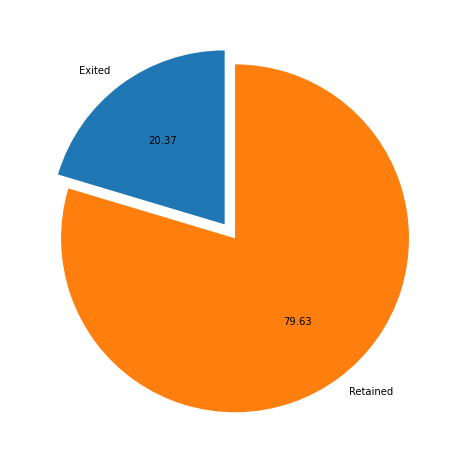

In [6]:
labels = "Exited", 'Retained'
portions = [df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
plt.figure(figsize = (8,8))
plt.pie(portions ,labels = labels, autopct='%.2f', startangle =90, explode=(0,0.1))
plt.show()

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

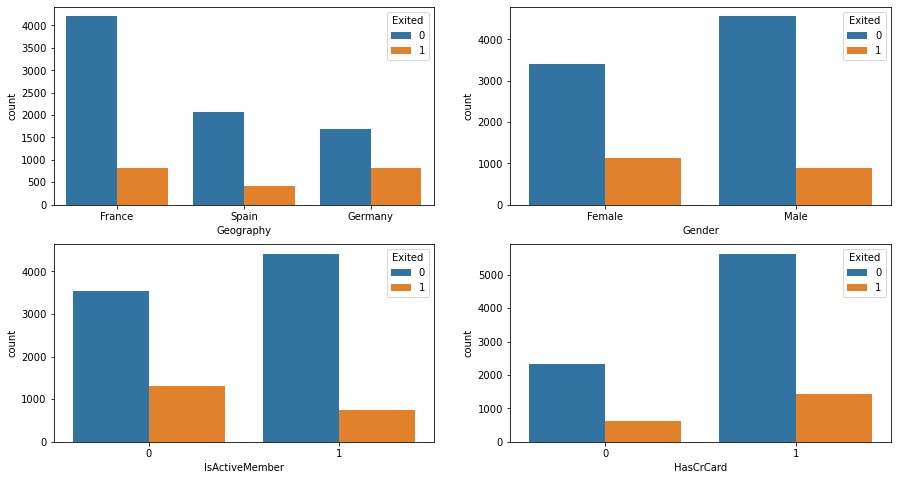

In [7]:
fig, ax = plt.subplots(2,2, figsize = (15,8))
sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = ax[1][1])

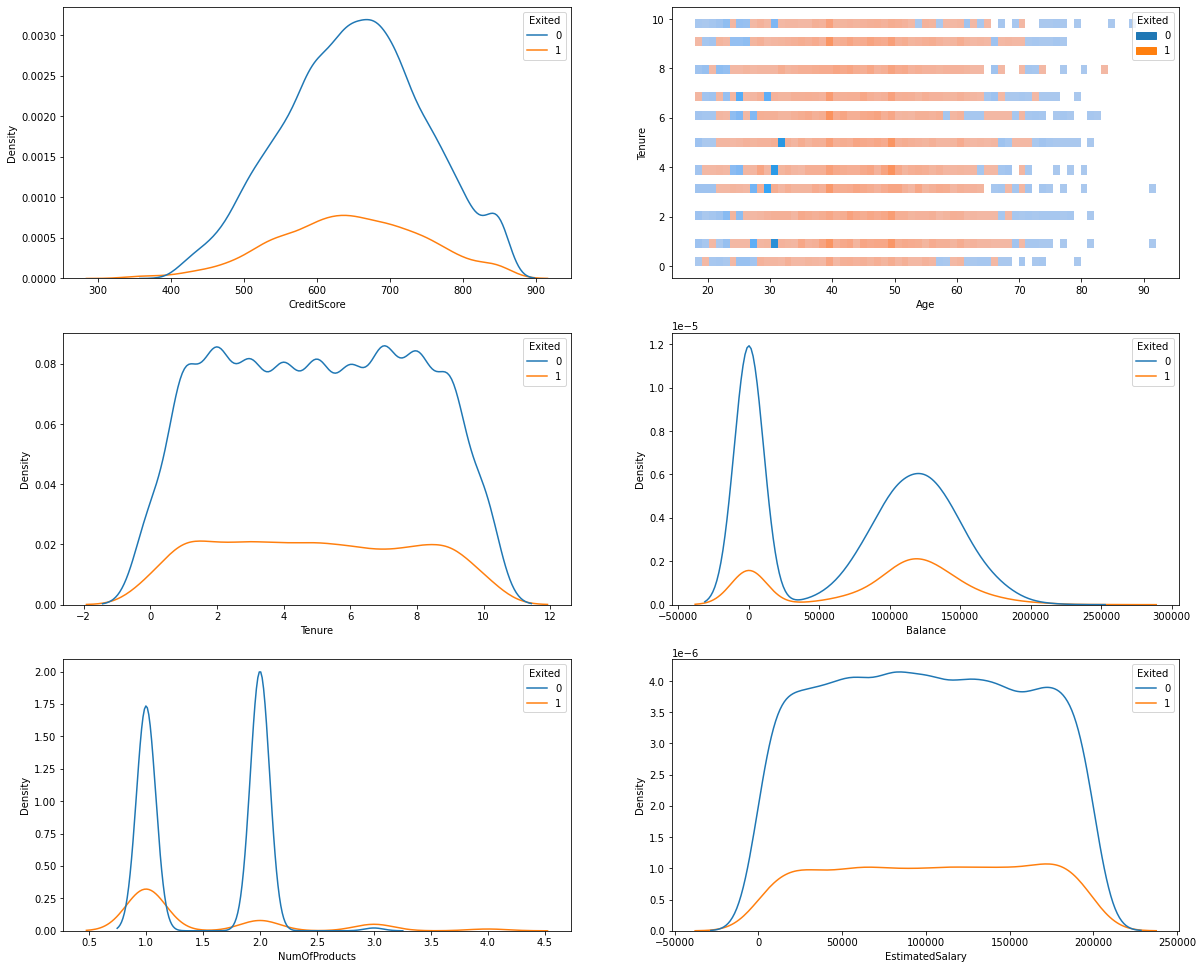

In [8]:
fig, ax = plt.subplots(3,2, figsize=(20,17))
sns.kdeplot(data = df, x = 'CreditScore', hue='Exited', ax = ax[0][0])
sns.histplot(data = df, x = 'Age',y = 'Tenure', hue = 'Exited', ax = ax[0][1])
sns.kdeplot(data = df, x = 'Tenure', hue = 'Exited', ax = ax[1][0])
sns.kdeplot(data = df, x = 'Balance', hue = 'Exited', ax = ax[1][1])
sns.kdeplot(data = df, x = 'NumOfProducts', hue = 'Exited', ax = ax[2][0])
sns.kdeplot(data = df, x = 'EstimatedSalary', hue = 'Exited', ax = ax[2][1])
plt.show()

<Figure size 1440x1440 with 0 Axes>

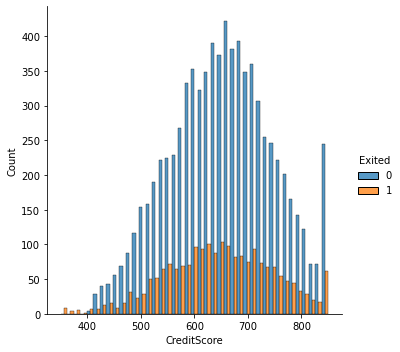

In [9]:
plt.figure(figsize =(20,20))
sns.displot(data = df, x ='CreditScore', hue = 'Exited', multiple = 'dodge')
plt.show()

We are looking for discrepancy in the means

In [10]:
df[df['Exited']==1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [11]:
X = df.drop('Exited', axis = 1)
y = df['Exited']
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [12]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(X[['Geography']]).toarray()

In [16]:
df_transformed = pd.DataFrame(transformed, columns = ohe.get_feature_names(['Geography']))
df_transformed

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [17]:
X = pd.concat([X,df_transformed],axis=1)
X.drop("Geography",axis = 1, inplace = True)
X.replace(["Female","Male"],[0,1], inplace = True )
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


<AxesSubplot:>

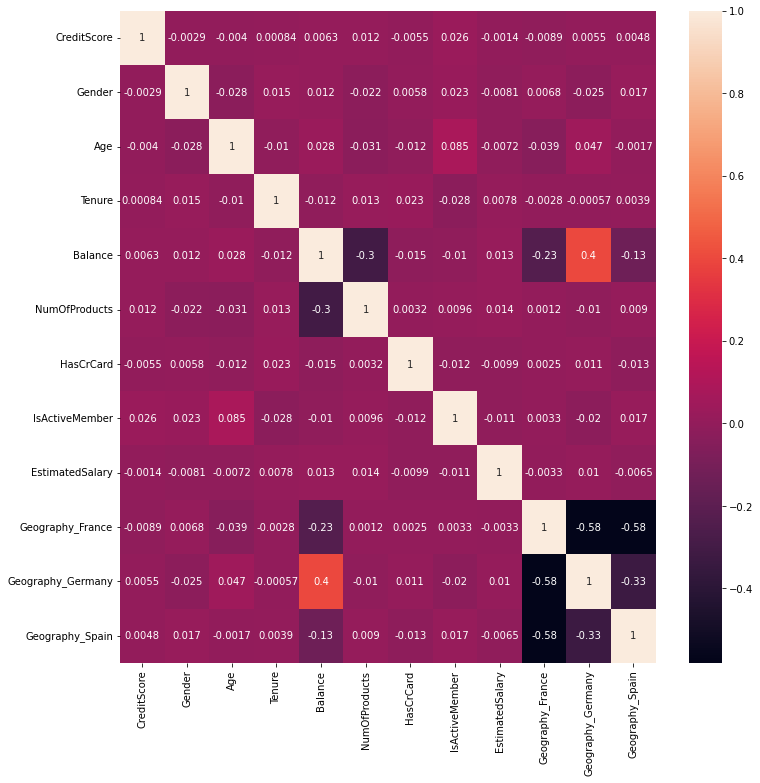

In [18]:
plt.figure(figsize = (12,12))
sns.heatmap(X.corr(), annot = True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Balance', 'Tenure', 'CreditScore', 'EstimatedSalary', 'NumOfProducts']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
192,-1.757690,1,0.101579,-1.385626,-1.218170,0.794830,0,0,0.256920,1.0,0.0,0.0
5779,0.344316,1,0.101579,-1.040599,-0.097110,-0.917639,1,1,0.265163,0.0,0.0,1.0
4364,-1.306528,1,-1.132226,1.029558,-0.234308,0.794830,1,0,0.816369,0.0,1.0,0.0
9017,1.841355,0,0.101579,1.029558,0.021081,-0.917639,0,1,-1.409141,0.0,1.0,0.0
7414,0.887761,0,0.576119,-1.040599,0.363471,0.794830,1,1,-0.377257,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5099,-0.568262,0,0.576119,1.374585,0.472409,-0.917639,0,0,1.590908,0.0,1.0,0.0
4031,0.385331,1,-0.183145,0.684532,0.985360,0.794830,1,1,0.238248,0.0,0.0,1.0
9831,0.559643,0,0.860843,-1.385626,1.283376,0.794830,1,1,-0.013890,0.0,1.0,0.0
2355,-0.834858,0,0.291395,-1.385626,-1.218170,-0.917639,1,1,-0.290386,0.0,0.0,1.0


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score

2022-03-31 21:59:11.452054: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-31 21:59:11.452077: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [24]:
model = keras.Sequential()
model.add(Dense(X.shape[1], activation = 'relu', input_dim = X.shape[1]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2022-03-31 21:59:13.388284: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-31 21:59:13.388351: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (T-ROG-Strix): /proc/driver/nvidia/version does not exist
2022-03-31 21:59:13.389245: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
X.shape

(10000, 12)

In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)

Epoch 1/10
700/700 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8141
Epoch 2/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3627 - accuracy: 0.8474
Epoch 3/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8544
Epoch 4/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3449 - accuracy: 0.8553
Epoch 5/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8576
Epoch 6/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8613
Epoch 7/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8597
Epoch 8/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8617
Epoch 9/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8613
Epoch 10/10
700/700 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8610

In [28]:
y_probs = model.predict(X_test)
y_probs[221]

array([0.10913542], dtype=float32)

In [29]:
y_pred = [1 if probs>=0.5 else 0 for probs in y_probs]

In [30]:
y_pred[221]

0

In [31]:
confusion_matrix(y_test, y_pred)

array([[2270,  138],
       [ 288,  304]])

In [32]:
ann_acc = accuracy_score(y_test, y_pred)

In [33]:
model.evaluate(X_train, y_train)

219/219 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8607


[0.3301505744457245, 0.8607142567634583]

## AutoML 

In [34]:
import h2o 
from h2o.automl import H2OAutoML
h2o.init(max_mem_size = '8G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.20.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.20.04, mixed mode, sharing)
  Starting server from /home/thayyeb/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc6rys6nn
  JVM stdout: /tmp/tmpc6rys6nn/h2o_thayyeb_started_from_python.out
  JVM stderr: /tmp/tmpc6rys6nn/h2o_thayyeb_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_thayyeb_gl65da
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [35]:
df = h2o.import_file('/home/thayyeb/Desktop/Project/bank_churn/Churn_Modelling.csv')
df.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [36]:
df['Exited'] = df['Exited'].asfactor()

In [37]:
df_train, df_test = df.split_frame(ratios = [.8])

In [38]:
y = 'Exited'
X = df.columns
cols_to_remove = ["Exited", 'RowNumber', 'CustomerId', 'Surname']
X = [col for col in X if col not in cols_to_remove]
X

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [39]:
aml = H2OAutoML(max_models = 12,verbosity = 'info')

In [40]:
aml.train(x= X , y = y, training_frame = df_train)

AutoML progress: |
21:59:56.154: Project: AutoML_1_20220331_215956
21:59:56.157: 5-fold cross-validation will be used.
21:59:56.165: Setting stopping tolerance adaptively based on the training frame: 0.011165694518168505
21:59:56.166: Build control seed: -1 (random)
21:59:56.167: training frame: Frame key: AutoML_1_20220331_215956_training_py_4_sid_9587    cols: 14    rows: 8021  chunks: 48    size: 549999  checksum: 4731989369022554678
21:59:56.167: validation frame: NULL
21:59:56.167: leaderboard frame: NULL
21:59:56.167: blending frame: NULL
21:59:56.167: response column: Exited
21:59:56.167: fold column: null
21:59:56.167: weights column: null
21:59:56.181: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10

,,0,1,Error,Rate
0,0,6012.0,357.0,0.0561,(357.0/6369.0)
1,1,390.0,1262.0,0.2361,(390.0/1652.0)
2,Total,6402.0,1619.0,0.0931,(747.0/8021.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.339019,0.771629,196.0
1,max f2,0.173133,0.812185,270.0
2,max f0point5,0.503960,0.816393,140.0
3,max accuracy,0.400547,0.909612,174.0
4,max precision,0.996039,1.000000,0.0
5,max recall,0.020044,1.000000,389.0
6,max specificity,0.996039,1.000000,0.0
7,max absolute_mcc,0.355392,0.714361,190.0
8,max min_per_class_accuracy,0.222834,0.866855,245.0
9,max mean_per_class_accuracy,0.239751,0.870455,237.0



Gains/Lift Table: Avg response rate: 20.60 %, avg score: 21.03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010098,0.969072,4.855327,4.855327,1.000000,0.981593,1.000000,0.981593,0.049031,0.049031,385.532688,385.532688,0.049031
1,2,0.020072,0.949808,4.855327,4.855327,1.000000,0.959640,1.000000,0.970685,0.048426,0.097458,385.532688,385.532688,0.097458
2,3,0.030046,0.928770,4.855327,4.855327,1.000000,0.939322,1.000000,0.960274,0.048426,0.145884,385.532688,385.532688,0.145884
3,4,0.040020,0.906995,4.855327,4.855327,1.000000,0.918252,1.000000,0.949801,0.048426,0.194310,385.532688,385.532688,0.194310
4,5,0.050118,0.881237,4.855327,4.855327,1.000000,0.895219,1.000000,0.938803,0.049031,0.243341,385.532688,385.532688,0.243341
5,6,0.100112,0.660110,4.492085,4.673932,0.925187,0.777465,0.962640,0.858235,0.224576,0.467918,349.208546,367.393235,0.463207
6,7,0.150106,0.462501,3.341821,4.230264,0.688279,0.556819,0.871262,0.757846,0.167070,0.634988,234.182099,323.026403,0.610651
7,8,0.200100,0.341158,2.482150,3.793508,0.511222,0.395840,0.781308,0.667401,0.124092,0.759080,148.214965,279.350773,0.703969
8,9,0.300087,0.207003,1.210805,2.932964,0.249377,0.267193,0.604071,0.534054,0.121065,0.880145,21.080471,193.296439,0.730514
9,10,0.400075,0.133450,0.671997,2.367899,0.138404,0.166680,0.487691,0.442239,0.067191,0.947337,-32.800339,136.789859,0.689211




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10150806614549288
RMSE: 0.31860330529593206
LogLoss: 0.33455494778997996
Null degrees of freedom: 8020
Residual degrees of freedom: 8011
Null deviance: 8159.741800781092
Residual deviance: 5366.930472446858
AIC: 5386.930472446858
AUC: 0.8649302272622725
AUCPR: 0.7112066606452295
Gini: 0.7298604545245451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3128316619414313: 


,,0,1,Error,Rate
0,0,5719.0,650.0,0.1021,(650.0/6369.0)
1,1,594.0,1058.0,0.3596,(594.0/1652.0)
2,Total,6313.0,1708.0,0.1551,(1244.0/8021.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312832,0.629762,204.0
1,max f2,0.134837,0.705578,293.0
2,max f0point5,0.592379,0.697492,112.0
3,max accuracy,0.491559,0.865104,140.0
4,max precision,0.998695,1.000000,0.0
5,max recall,0.010575,1.000000,398.0
6,max specificity,0.998695,1.000000,0.0
7,max absolute_mcc,0.491559,0.544212,140.0
8,max min_per_class_accuracy,0.179217,0.781598,267.0
9,max mean_per_class_accuracy,0.208375,0.783664,252.0



Gains/Lift Table: Avg response rate: 20.60 %, avg score: 20.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010098,0.959073,4.795385,4.795385,0.987654,0.972473,0.987654,0.972473,0.048426,0.048426,379.538457,379.538457,0.048269
1,2,0.020072,0.932597,4.855327,4.825170,1.000000,0.946192,0.993789,0.959414,0.048426,0.096852,385.532688,382.516957,0.096695
2,3,0.030046,0.909160,4.491177,4.714301,0.925000,0.921445,0.970954,0.946810,0.044794,0.141646,349.117736,371.430078,0.140547
3,4,0.040020,0.876923,4.551869,4.673819,0.937500,0.892320,0.962617,0.933230,0.045400,0.187046,355.186895,367.381933,0.185162
4,5,0.050118,0.843587,4.315846,4.601690,0.888889,0.860212,0.947761,0.918517,0.043584,0.230630,331.584611,360.169040,0.227332
5,6,0.100112,0.620376,3.596090,4.099516,0.740648,0.737404,0.844334,0.828073,0.179782,0.410412,259.608998,309.951634,0.390785
6,7,0.150106,0.438908,2.409501,3.536646,0.496259,0.523781,0.728405,0.726727,0.120460,0.530872,140.950137,253.664591,0.479529
7,8,0.200100,0.330282,1.779883,3.097729,0.366584,0.382263,0.638006,0.640665,0.088983,0.619855,77.988292,209.772880,0.528632
8,9,0.300087,0.208559,1.307669,2.501290,0.269327,0.263388,0.515164,0.514958,0.130751,0.750605,30.766908,150.129012,0.567374
9,10,0.400075,0.135756,0.871779,2.094039,0.179551,0.168083,0.431287,0.428266,0.087167,0.837772,-12.822061,109.403939,0.551228


In [41]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_5_AutoML_1_20220331_215956,0.86493,0.334555,0.711207,0.230811,0.318603,0.101508
StackedEnsemble_AllModels_2_AutoML_1_20220331_215956,0.864762,0.334706,0.711073,0.23006,0.31867,0.10155
StackedEnsemble_BestOfFamily_3_AutoML_1_20220331_215956,0.864674,0.334392,0.711158,0.233186,0.318486,0.101433
StackedEnsemble_BestOfFamily_6_AutoML_1_20220331_215956,0.864461,0.334673,0.710643,0.234262,0.318605,0.101509
StackedEnsemble_AllModels_1_AutoML_1_20220331_215956,0.86423,0.335229,0.710634,0.235213,0.318839,0.101658
StackedEnsemble_BestOfFamily_2_AutoML_1_20220331_215956,0.862597,0.336859,0.707082,0.236558,0.319691,0.102203
GBM_2_AutoML_1_20220331_215956,0.862069,0.337532,0.706444,0.233053,0.319957,0.102373
GBM_5_AutoML_1_20220331_215956,0.861548,0.338587,0.703969,0.233814,0.320677,0.102834
GBM_1_AutoML_1_20220331_215956,0.861262,0.34007,0.700428,0.242667,0.321345,0.103262
StackedEnsemble_BestOfFamily_1_AutoML_1_20220331_215956,0.861084,0.340048,0.700246,0.244213,0.321364,0.103275


In [42]:
aml_y_pred = aml.leader.predict(df_test)
aml_y_pred['predict'].tail()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict
0
1
0
0
0
0
1
0
0
1


In [43]:
perform = aml.leader.model_performance(df_test)

In [44]:
print(f'H2O AutoML: {perform.accuracy()[0][1]:.3f},\nNeural Networks: {ann_acc:.3f}')

H2O AutoML: 0.872,
Neural Networks: 0.858
